In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from impyute.imputation.cs import fast_knn
import pickle
import matplotlib.patches as mpatches
from pandas_profiling import ProfileReport

# Scores
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Ignoring Errors
import warnings
warnings.simplefilter('ignore')

In [2]:
matrices_0 = pd.read_excel('matrices_0.xlsx')
matrices_25 = pd.read_excel('matrices_25.xlsx')
model_names = matrices_0["Unnamed: 1"].unique()
colors = ['r', 'g', 'b', 'purple']

In [3]:
auc_scores = {'0':{}, '25':{}}

for mdl_name in model_names:
    auc_scores['0'][mdl_name] = matrices_0[matrices_0['Unnamed: 1'] == mdl_name]['AUC'].values
    auc_scores['25'][mdl_name] = matrices_25[matrices_25['Unnamed: 1'] == mdl_name]['AUC'].values

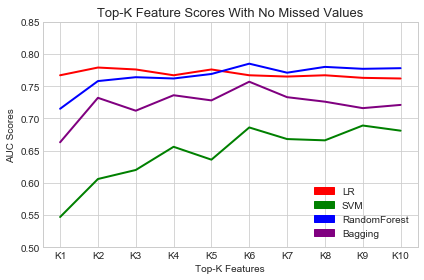

In [7]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6,4))
plt.ylim([0.5,0.85])

legends = []
for i in range(len(model_names)):
    plt.plot([f'K{i}' for i in range(1,11)],
            auc_scores["0"][model_names[i]],
            color = colors[i], linewidth=2)
    legends.append(mpatches.Patch(color=colors[i], label=model_names[i]))
plt.legend(handles=legends,loc='best')
plt.title('Top-K Feature Scores With No Missed Values', size=13)
plt.xlabel('Top-K Features'); plt.ylabel('AUC Scores')

plt.tight_layout()
plt.savefig('linechart_0threshold.png', dpi=300, bbox_inches='tight')

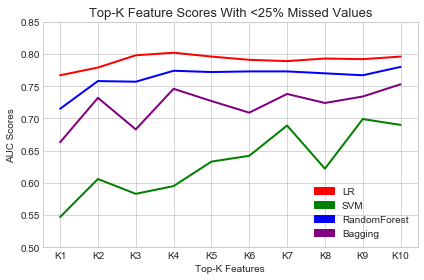

In [8]:
plt.figure(figsize=(6,4))
plt.ylim([0.5,0.85])

legends = []
for i in range(len(model_names)):
    plt.plot([f'K{i}' for i in range(1,11)],
            auc_scores["25"][model_names[i]],
            color = colors[i], linewidth=2)
    legends.append(mpatches.Patch(color=colors[i], label=model_names[i]))
plt.legend(handles=legends,loc='best')
plt.title('Top-K Feature Scores With <25% Missed Values', size=13)
plt.xlabel('Top-K Features'); plt.ylabel('AUC Scores')

plt.tight_layout()
plt.savefig('linechart_25threshold.png', dpi=300, bbox_inches='tight')

In [10]:
data = pd.read_excel("NAFLD with FIB4 and NFS Scores.xlsx").drop(294)
features_df = pd.concat([data.iloc[:,1:-13], data[['FIB-4', 'NFS']]], axis=1).drop(columns=["Height", 'Weight'])
targets_df = data[['Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)',
                         'Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, there is Advanced Fibrosis)']]

In [12]:
profile = ProfileReport(features_df, title='Pandas Profiling Report')

In [15]:
profile